## <span style="color: #f0f">Задание 1</span>

1. Из папки images загрузите изображение 'operator.png'. Выполните свёртку этого изображения с различными фильтрами, которые позволят сделать следующее:
- Выделить только вертикальные границы
- Выделить только горизонтальные границы
- Выделить диагональные границы, идущие из северо-западного угла в юго-восточный.

Фильтры постройте самостотельно и поясните, почему использовали именно такие коэффициенты.

2. Попробуйте несколько раз подряд выполнить свёртку изображения с фильтром размером 3х3, в котором все коэффициенты равны 1. Визуализируйте промежуточные результаты и объясните их.

In [11]:
import pandas as pd
import numpy as np

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



 Тип оригинального изображения: <PIL.Image.Image image mode=L size=464x462 at 0x7978F963F0D0> 


После преобразования в числовой формат: 

 array([[  9,  34,  37, ...,  37,  41,  33],
       [ 30, 152, 164, ..., 153, 148, 132],
       [ 35, 154, 156, ..., 153, 158, 128],
       ...,
       [ 22, 116, 121, ..., 127, 115,  95],
       [ 24, 112, 120, ..., 127, 115,  95],
       [ 24, 118, 122, ..., 122, 114,  92]], dtype=uint8)

 Входное изображение, конвертированное в полутоновое: 



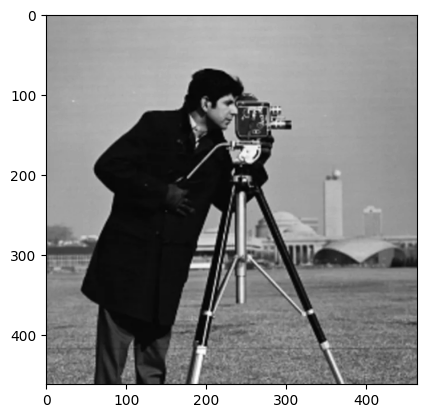

In [13]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('/content/drive/MyDrive/Academic/ML/Lab09 - CNN/images/operator.png')
# Конвертируем цветное в полутоновое, используя преобразование ITU-R 601-2 Luma
image_gr = im.convert("L")

print("\n Тип оригинального изображения: %r \n\n" % image_gr)
arr = np.asarray(image_gr)
print("После преобразования в числовой формат: \n\n %r" % arr)
%matplotlib inline

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("\n Входное изображение, конвертированное в полутоновое: \n")
plt.show(imgplot)

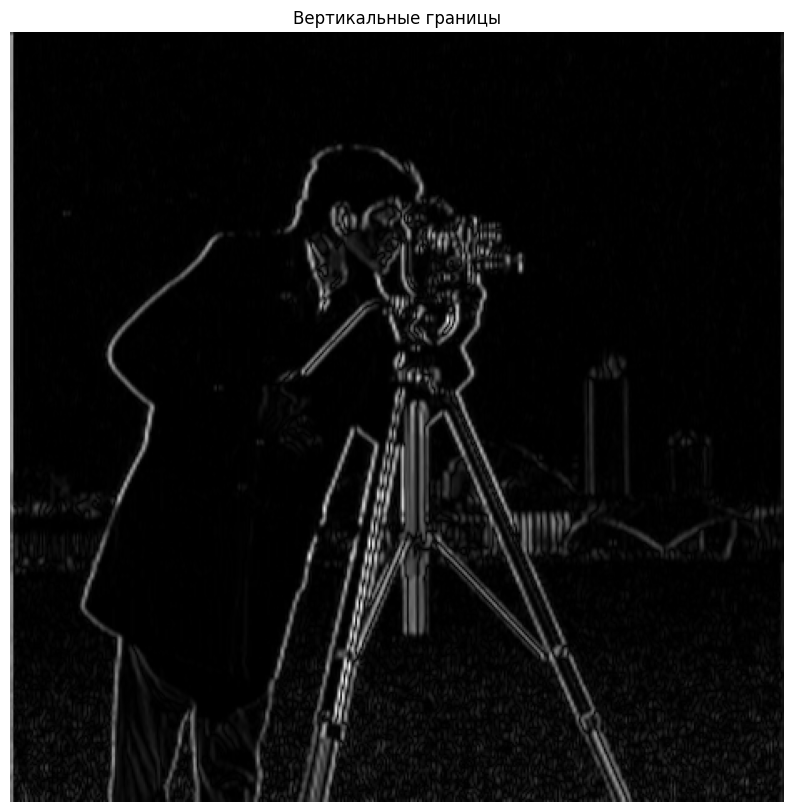

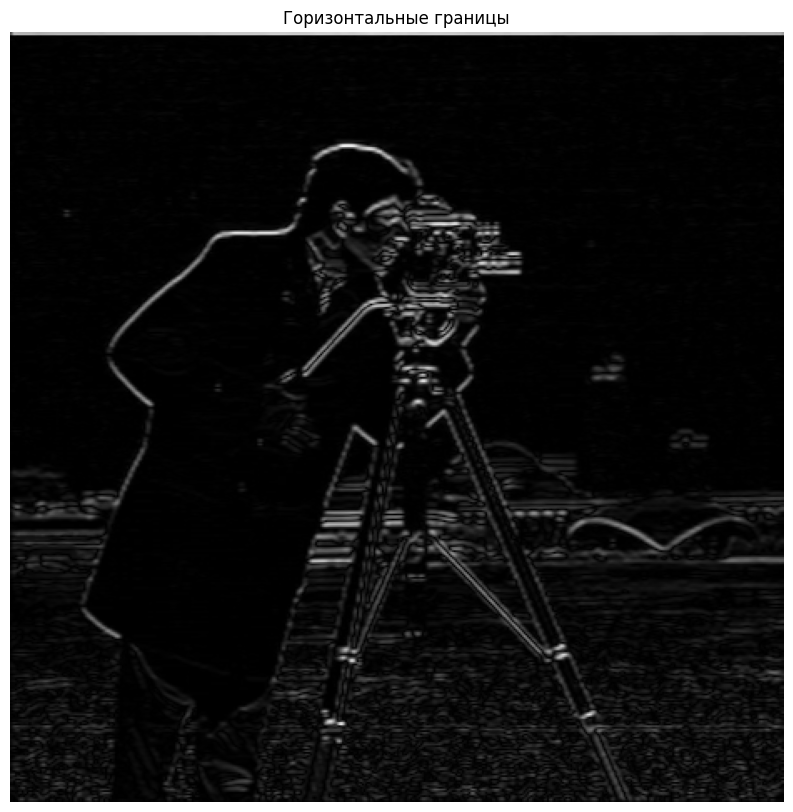

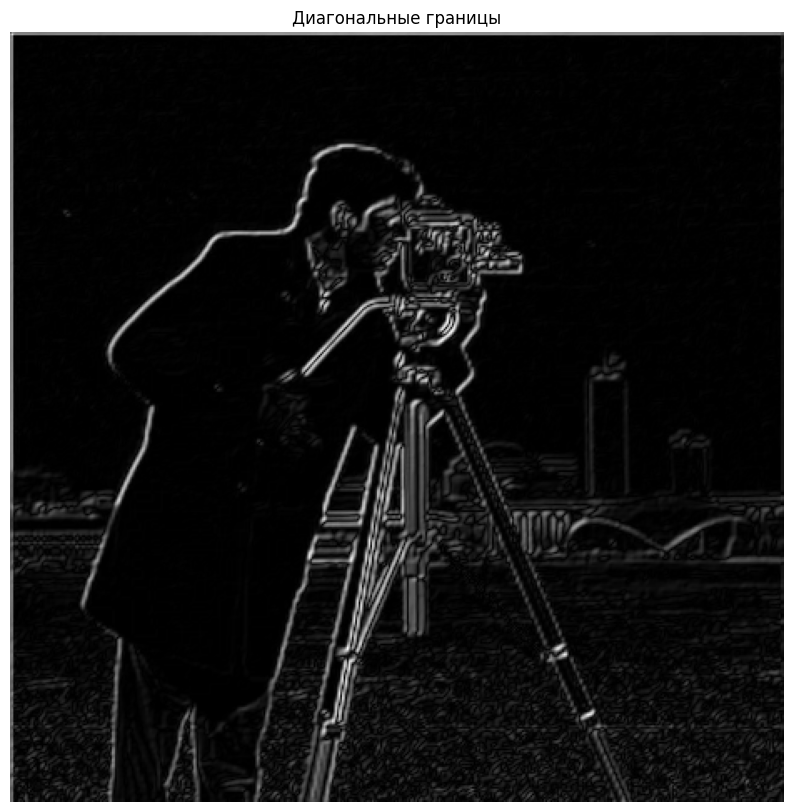

In [17]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from PIL import Image

# Функция для отображения изображения
def display_image(image, title):
    fig, aux = plt.subplots(figsize=(10, 10))
    aux.imshow(image, cmap='gray')
    aux.set_title(title)
    aux.axis('off')
    plt.show()

# Определение фильтров

# Вертикальные границы
vertical_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
# Горизонтальные
horizontal_filter = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])
# Диагональные
diagonal_filter = np.array([
    [-1, -1, 0],
    [-1, 0, 1],
    [0, 1, 1]
])

# Применение фильтров
vertical_edges = signal.convolve2d(image_gr, vertical_filter, mode='same', boundary='symm')
horizontal_edges = signal.convolve2d(image_gr, horizontal_filter, mode='same', boundary='symm')
diagonal_edges = signal.convolve2d(image_gr, diagonal_filter, mode='same', boundary='symm')

# Вывод результатов
display_image(np.abs(vertical_edges), 'Вертикальные границы')
display_image(np.abs(horizontal_edges), 'Горизонтальные границы')
display_image(np.abs(diagonal_edges), 'Диагональные границы')

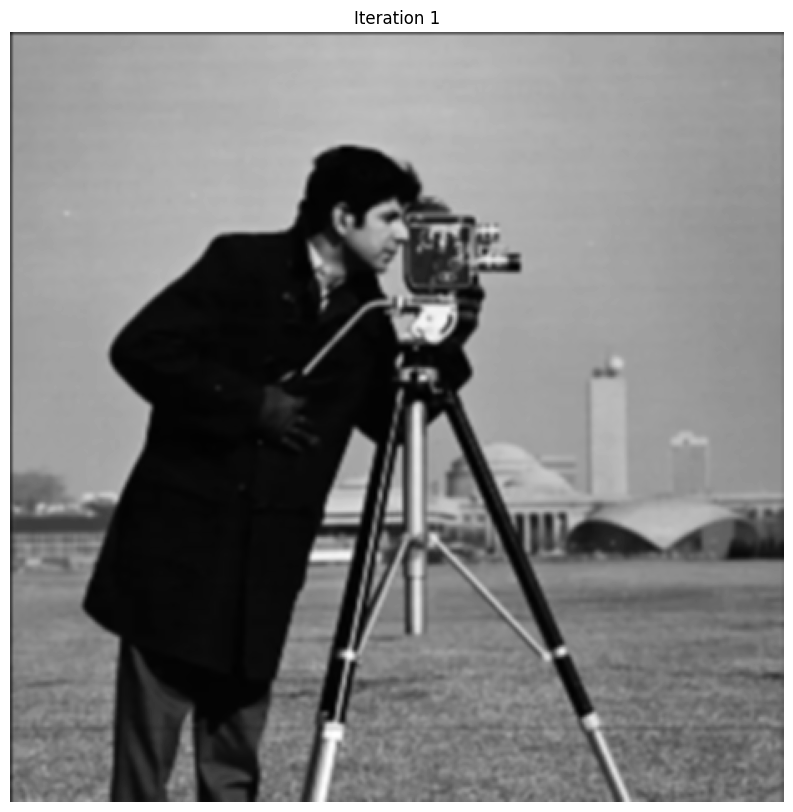

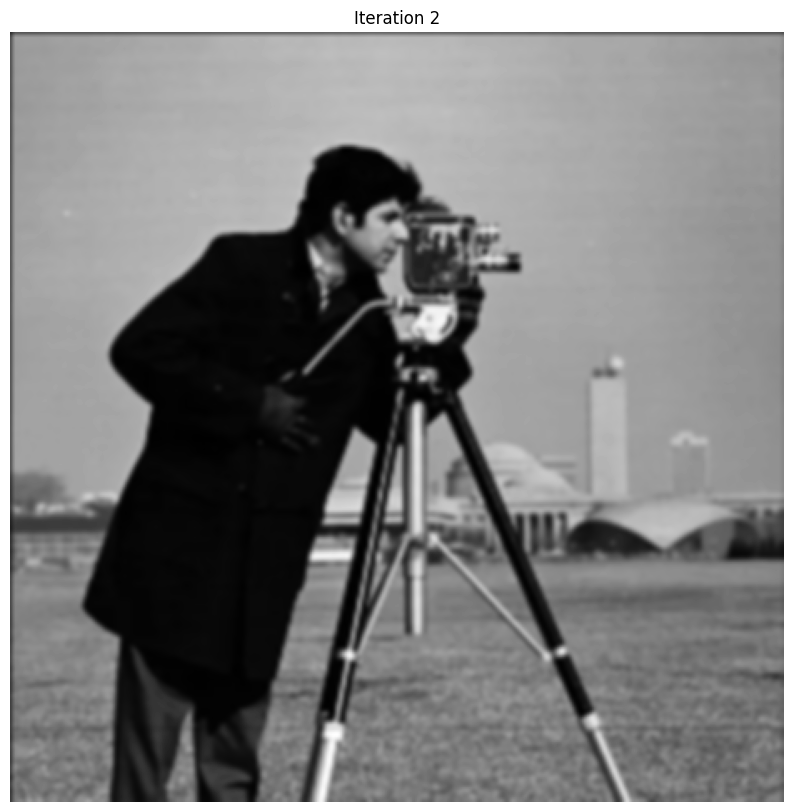

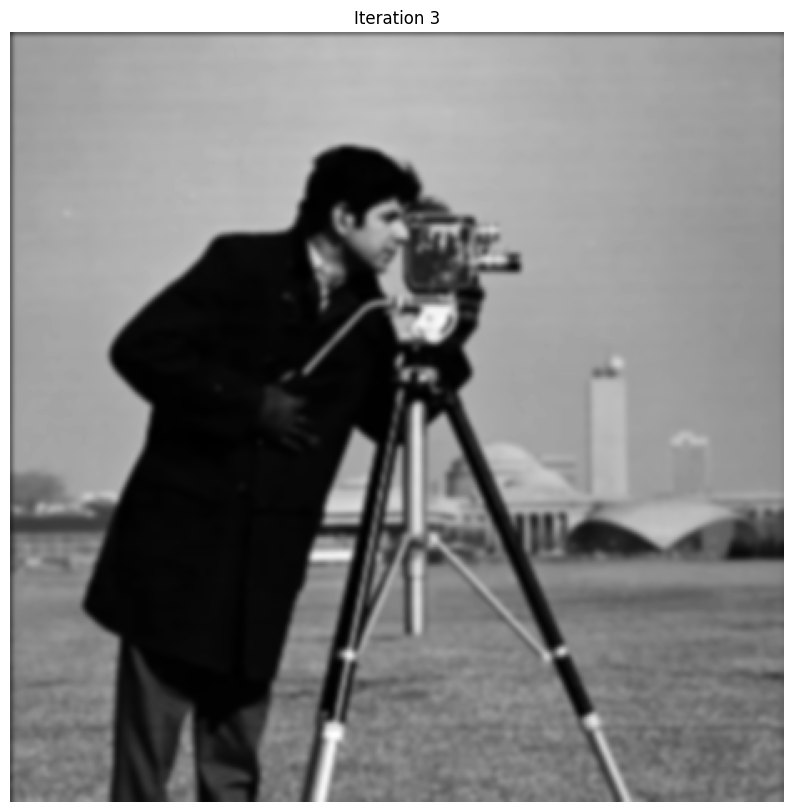

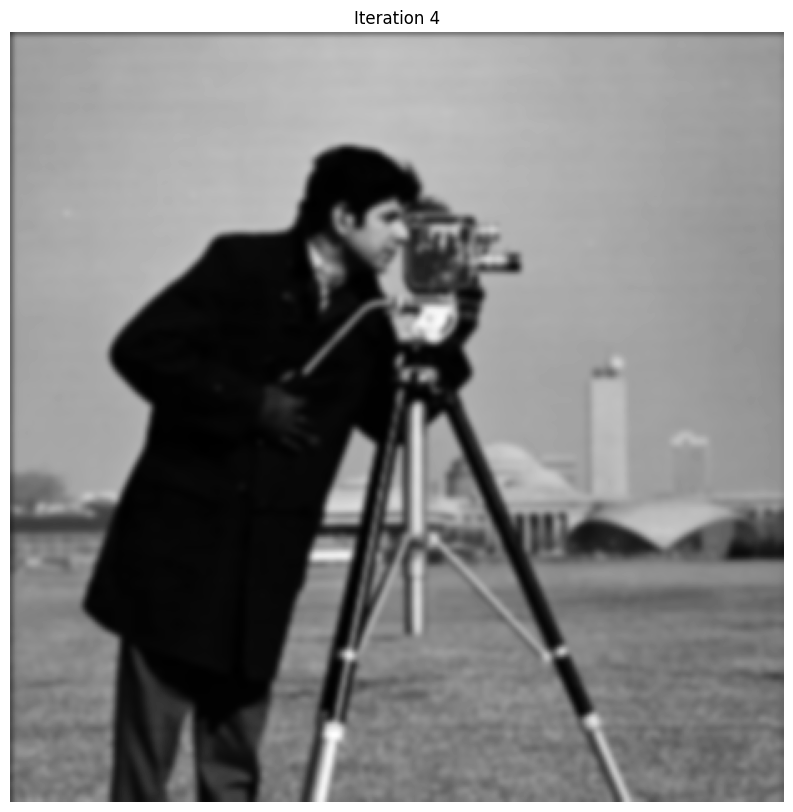

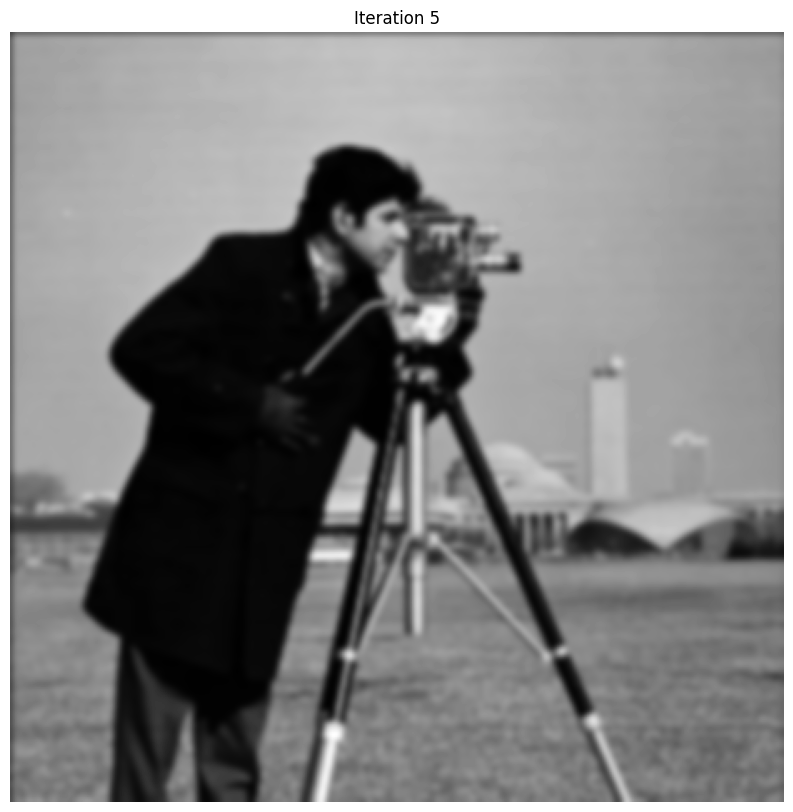

In [20]:
# Фильтр 3x3 с коэффициентами, равными 1
kernel = np.ones((3, 3))

test_image = image_gr.copy()

# Визуализация промежуточных результатов
for i in range(5):
    # Свертка изображения
    convolved_image = signal.convolve2d(test_image, kernel, mode='same', boundary='symm')

    # Вывод промежуточного результата
    display_image(convolved_image, f'Iteration {i+1}')

    # Обновление изображения для следующей итерации
    test_image = convolved_image.copy()

Вывод

Изображение размылось из-за использования фильтра с коэффициентами, равными 1. Фильтр с такими коэффициентами выполняет усреднение значений пикселей в окрестности каждого пикселя при свертке. Это приводит к тому, что каждый пиксель в новом изображении представляет собой усредненное значение вокруг себя.

При многократном применении фильтра усреднения (размытия) эффект усреднения усиливается, что приводит к более заметному размытию изображения. В результате все больше высокочастотных компонентов изображения теряются.